# Live Train and Decode
### In this example we showcase the nm_train and its Trainer class which allows users to train simple models
### For this example we use the following additional tools:
- The OpenBCI ExG Headphones (https://github.com/MKnierim/openbci-headphones)
- The OpenBCI GUI (https://docs.openbci.com/Software/OpenBCISoftware/GUIDocs/)

You could run this example without any other applications by just starting a stream from any other LSL Source (like the nm_mnelsl_generator)

___
## First let's setup the OpenBCI GUI and a lsl stream.
#### To do so, make sure to first run a stream and then open the Networking section. Here you need to select the LSL Protocol and turn the Data Type to 'TimeSeriesRaw'.

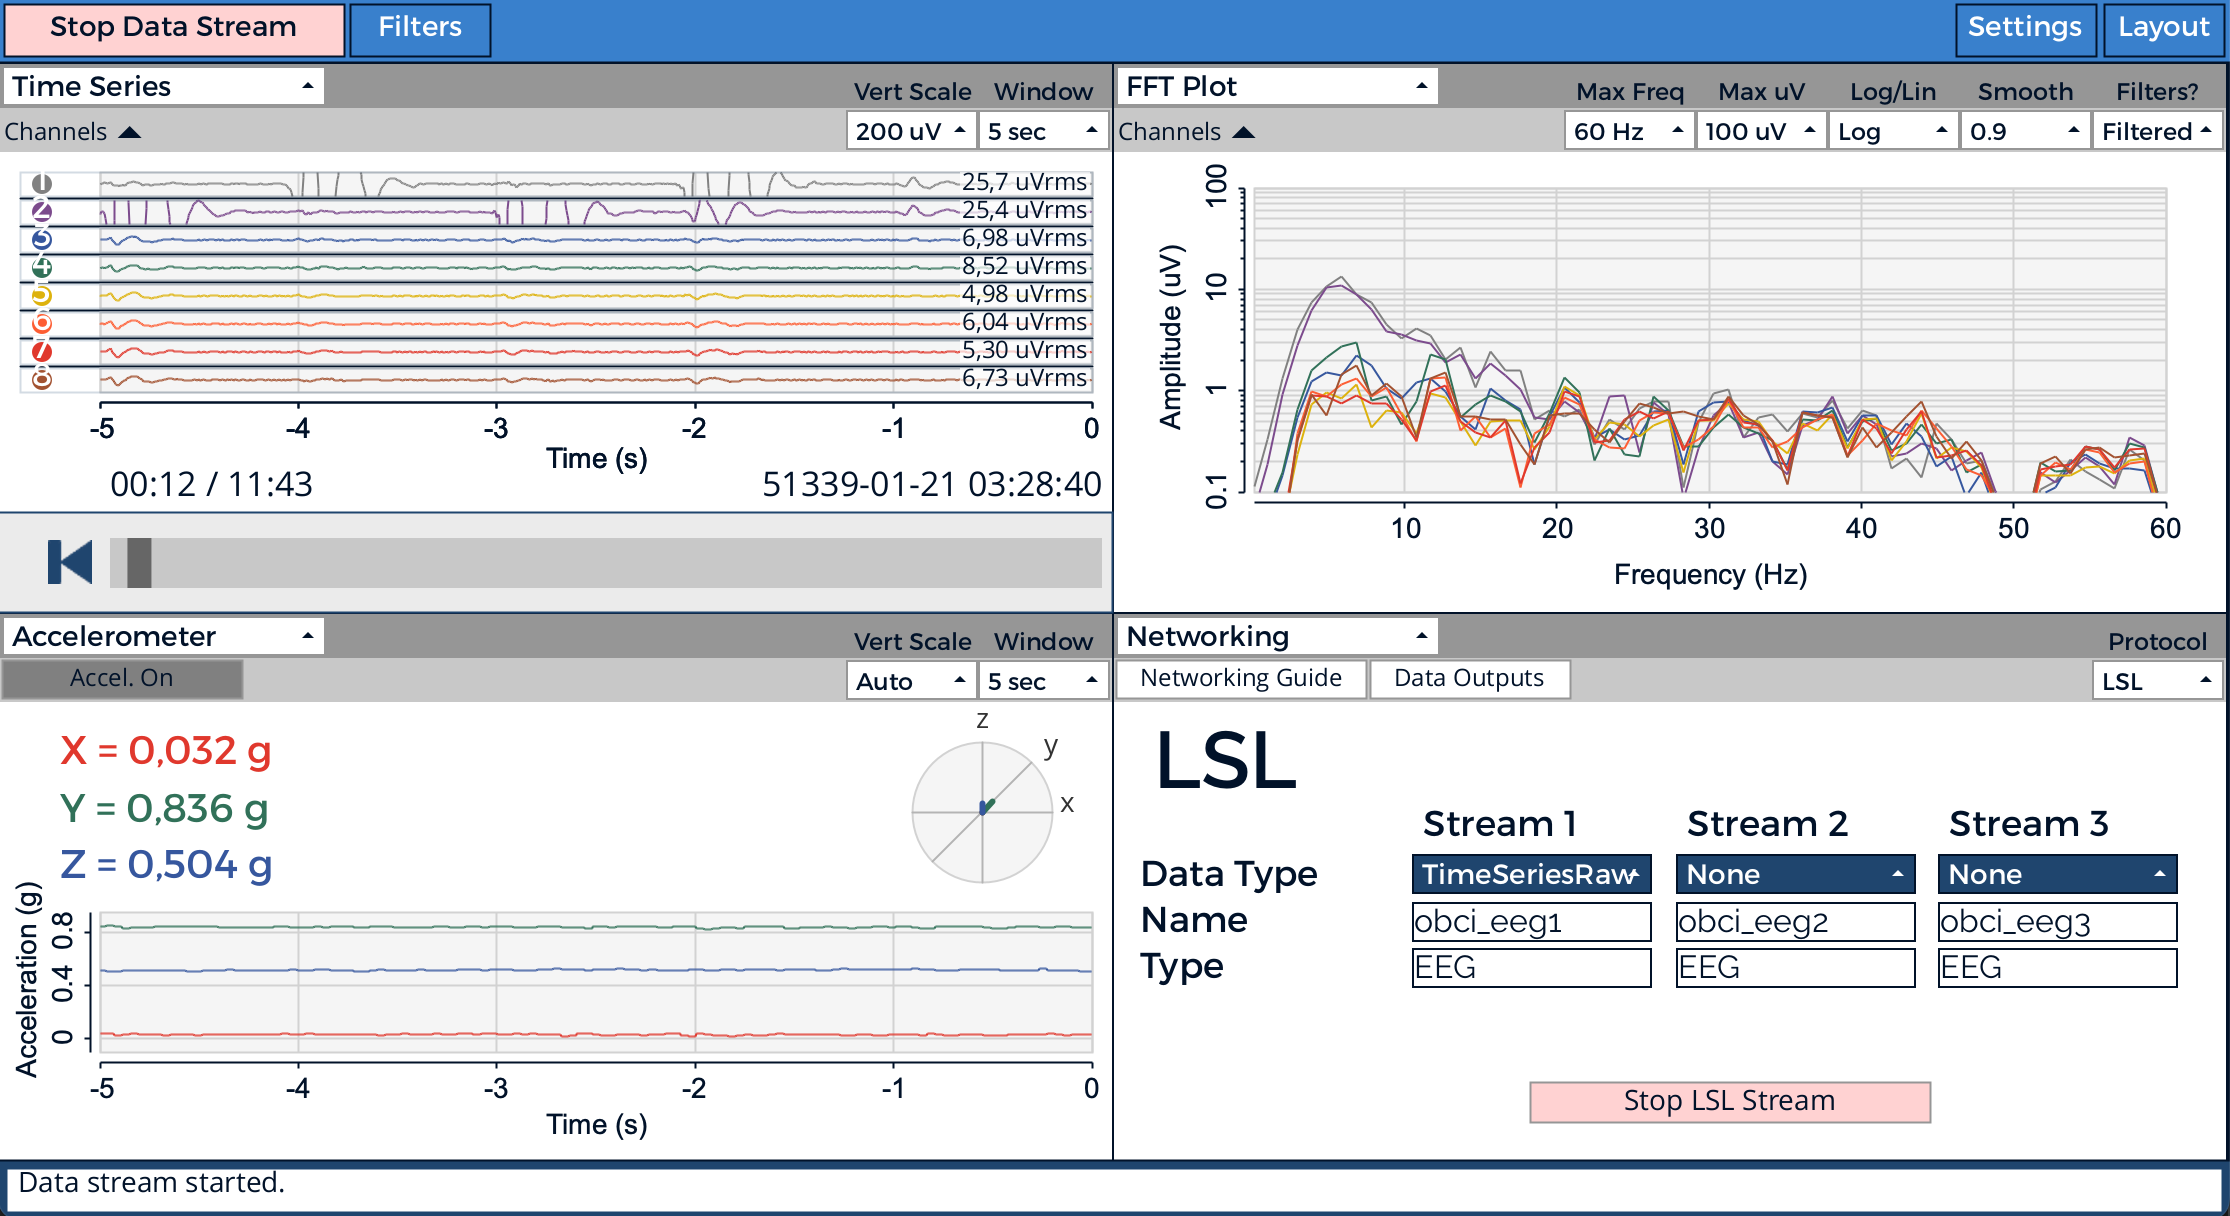

In [1]:
from sklearn.ensemble import RandomForestClassifier
from py_neuromodulation import nm_train
from py_neuromodulation import (nm_settings, nm_define_nmchannels, nm_mnelsl_generator, nm_stream_offline)
from mne_lsl.lsl import resolve_streams


### Let's connect to the stream

In [2]:
possible_streams = resolve_streams()
possible_streams

exg_stream = possible_streams[0]
print(f'Possible stream: {exg_stream}')

2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 32768, multicast: 1, broadcast: 0)
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-06-12 16:46:52.471 (   0.015s) [          A770D1]      netinterfaces.cpp:91    I

Possible stream: < sInfo 'obci_eeg1' >
  | Type: EEG
  | Sampling: 250.0 Hz
  | Number of channels: 8
  | Data type: <class 'numpy.float32'>
  | Source: openbcigui



### Looks like we found the OopenBCI stream. 
Great next let's define our stream to get the data and analyse it.

In [3]:
settings = nm_settings.get_default_settings()
settings = nm_settings.set_settings_fast_compute(settings)
ch_names = []
ch_types = []
for i in range(exg_stream.n_channels):
    ch_names.append(f'ch{i}')
    ch_types.append(exg_stream.stype)

nm_channels = nm_define_nmchannels.set_channels(
    ch_names = ch_names,
    ch_types= ch_types,
    reference = "default",
    new_names = "default",
    used_types= ("eeg", "ecog", "dbs", "seeg"),
    target_keywords=["MOV_RIGHT"]
)

stream_name = exg_stream.name
stream = nm_stream_offline.Stream(sfreq=exg_stream.sfreq, nm_channels=nm_channels, settings=settings, verbose=True, line_noise=50)

### Next we setup the Trainer. 
For this very basic example we would like to train a teeth clench classifier.
As a model we choose a Random Forest Classifier

In [4]:
classes = ['relax', 'clench']
model = RandomForestClassifier(n_estimators=100, random_state=42)

trainer = nm_train.Trainer(stream=stream, stream_name=stream_name, classes = classes, model = model)
trainer.start()
trainer.app.exit()

## Now we that we trained the model let's decode some new data


In [5]:
stream_decode = nm_stream_offline.Stream(sfreq=exg_stream.sfreq, nm_channels=nm_channels, settings=settings, verbose=True, line_noise=50)
stream.run(stream_lsl_name = stream_name, stream_lsl=True, live_decode=True)

2024-06-12 16:46:53.516 (   1.060s) [          A770D1]             common.cpp:65    INFO| git:v1.16.0-1-gdad9c99d/branch:master/build:Release/compiler:AppleClang-13.1.6.13160021/link:SHARED
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_mnelsl_stream.py:41: RuntimeWarning: Something went wrong while reading the channel description. Defaulting to channel IDs and MNE-compatible stream type.
  self.stream = StreamLSL(name=stream_name, bufsize=2).connect(timeout=2)
py_neuromodulation:	Pull data - current time: 1718203614.803935
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_oscillatory.py:105: RuntimeWarning: Mean of empty slice
  np.nanmean(data)
py_neuromodulation:	Last batch took: 0.03 seconds
py_neuromodulation:	1.00 seconds of data processed


ValueError: Error predicting results: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ch0_LineLength
- ch0_RawHjorth_Activity
- ch0_RawHjorth_Complexity
- ch0_RawHjorth_Mobility
- ch0_raw
- ...
